<a href="https://colab.research.google.com/github/cjerryc/WorldHappiness_dataset/blob/main/DATA301_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clean the Datasets

**Clean** this dataset to standardize the feature names and to drop extranneous statistics that only appear once per year, then merge all 5 CSV's into one with OUTER JOIN.

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("https://raw.githubusercontent.com/cjerryc/WorldHappiness_dataset/refs/heads/main/2015.csv")
df1["year"] = 2015
df1 = df1.drop(['Standard Error', 'Region'], axis=1)
df1.rename(columns={'Family': 'Social support'}, inplace=True)
df1 = df1.drop(['Dystopia Residual'], axis=1)

df2 = pd.read_csv("https://raw.githubusercontent.com/cjerryc/WorldHappiness_dataset/refs/heads/main/2016.csv")
df2["year"] = 2016
df2 = df2.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Region'], axis=1)
df2.rename(columns={'Family': 'Social support'}, inplace=True)
df2 = df2.drop(['Dystopia Residual'], axis=1)

df3 = pd.read_csv("https://raw.githubusercontent.com/cjerryc/WorldHappiness_dataset/refs/heads/main/2017.csv")
df3["year"] = 2017
df3.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace=True)
df3.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
df3.rename(columns={'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'}, inplace=True)
df3.rename(columns={'Health..Life.Expectancy.': 'Health (Life Expectancy)'}, inplace=True)
df3.rename(columns={'Trust..Government.Corruption.': 'Trust (Government Corruption)'}, inplace=True)
df3.rename(columns={'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)
df3.rename(columns={'Family': 'Social support'}, inplace=True)
df3 = df3.drop(['Whisker.high', 'Whisker.low', 'Dystopia Residual'], axis=1)


df4 = pd.read_csv("https://raw.githubusercontent.com/cjerryc/WorldHappiness_dataset/refs/heads/main/2018.csv")
df4["year"] = 2018
df4.rename(columns={'Country or region': 'Country'}, inplace=True)
df4.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
df4.rename(columns={'Score': 'Happiness Score'}, inplace=True)
df4.rename(columns={'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
df4.rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
df4.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)
df4.rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

df5 = pd.read_csv("https://raw.githubusercontent.com/cjerryc/WorldHappiness_dataset/refs/heads/main/2019.csv")
df5["year"] = 2019
df5.rename(columns={'Country or region': 'Country'}, inplace=True)
df5.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
df5.rename(columns={'Score': 'Happiness Score'}, inplace=True)
df5.rename(columns={'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
df5.rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
df5.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)
df5.rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)

In [ ]:
df1.dtypes

,0
Country,object
Happiness Rank,int64
Happiness Score,float64
Economy (GDP per Capita),float64
Social support,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64
Generosity,float64
year,int64


In [ ]:
df2.dtypes

,0
Country,object
Happiness Rank,int64
Happiness Score,float64
Economy (GDP per Capita),float64
Social support,float64
Health (Life Expectancy),float64
Freedom,float64
Trust (Government Corruption),float64
Generosity,float64
year,int64


In [ ]:
df3.dtypes

,0
Country,object
Happiness Rank,int64
Happiness Score,float64
Economy (GDP per Capita),float64
Social support,float64
Health (Life Expectancy),float64
Freedom,float64
Generosity,float64
Trust (Government Corruption),float64
year,int64


In [ ]:
df4.dtypes

,0
Happiness Rank,int64
Country,object
Happiness Score,float64
Economy (GDP per Capita),float64
Social support,float64
Health (Life Expectancy),float64
Freedom,float64
Generosity,float64
Trust (Government Corruption),float64
year,int64


In [ ]:
df5.dtypes

,0
Happiness Rank,int64
Country,object
Happiness Score,float64
Economy (GDP per Capita),float64
Social support,float64
Health (Life Expectancy),float64
Freedom,float64
Generosity,float64
Trust (Government Corruption),float64
year,int64


In [ ]:
# merge 1 and 2
df_merge = (
  df1
  .merge(df2,
         on = ["Country", "Happiness Rank", "Happiness Score",
               "Economy (GDP per Capita)", "Social support",
               "Health (Life Expectancy)","Freedom",
               "Trust (Government Corruption)", "Generosity", "year"],
         how = "outer")
    )
# merge merged and 3
df_merge = (
  df_merge
  .merge(df3,
         on = ["Country", "Happiness Rank", "Happiness Score", "Economy (GDP per Capita)",
               "Social support",
               "Health (Life Expectancy)","Freedom",
               "Trust (Government Corruption)", "Generosity", "year"],
         how = "outer")
    )
# merge merged and 4
df_merge = (
  df_merge
  .merge(df4,
         on = ["Country", "Happiness Rank", "Happiness Score",
               "Economy (GDP per Capita)", "Social support",
               "Health (Life Expectancy)","Freedom",
               "Trust (Government Corruption)", "Generosity", "year"],
         how = "outer")
    )
# merge merged and 5
df_merge = (
  df_merge
  .merge(df5,
         on = ["Country", "Happiness Rank", "Happiness Score",
               "Economy (GDP per Capita)",
               "Social support", "Health (Life Expectancy)",
               "Freedom",
               "Trust (Government Corruption)", "Generosity", "year"],
         how = "outer")
    )

df_merge.fillna(0, inplace=True)
df_merge[df_merge.isna().any(axis=1)]
df_merge[df_merge["Country"] == "Norway"]


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
522,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017
523,Norway,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2018
524,Norway,3,7.554,1.488000,1.582000,1.028000,0.603000,0.341000,0.271000,2019
525,Norway,4,7.498,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016
526,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015


## Visualizations

**Visualize** the merged dataset to find relationships between predictors and Happiness Score/Rank.

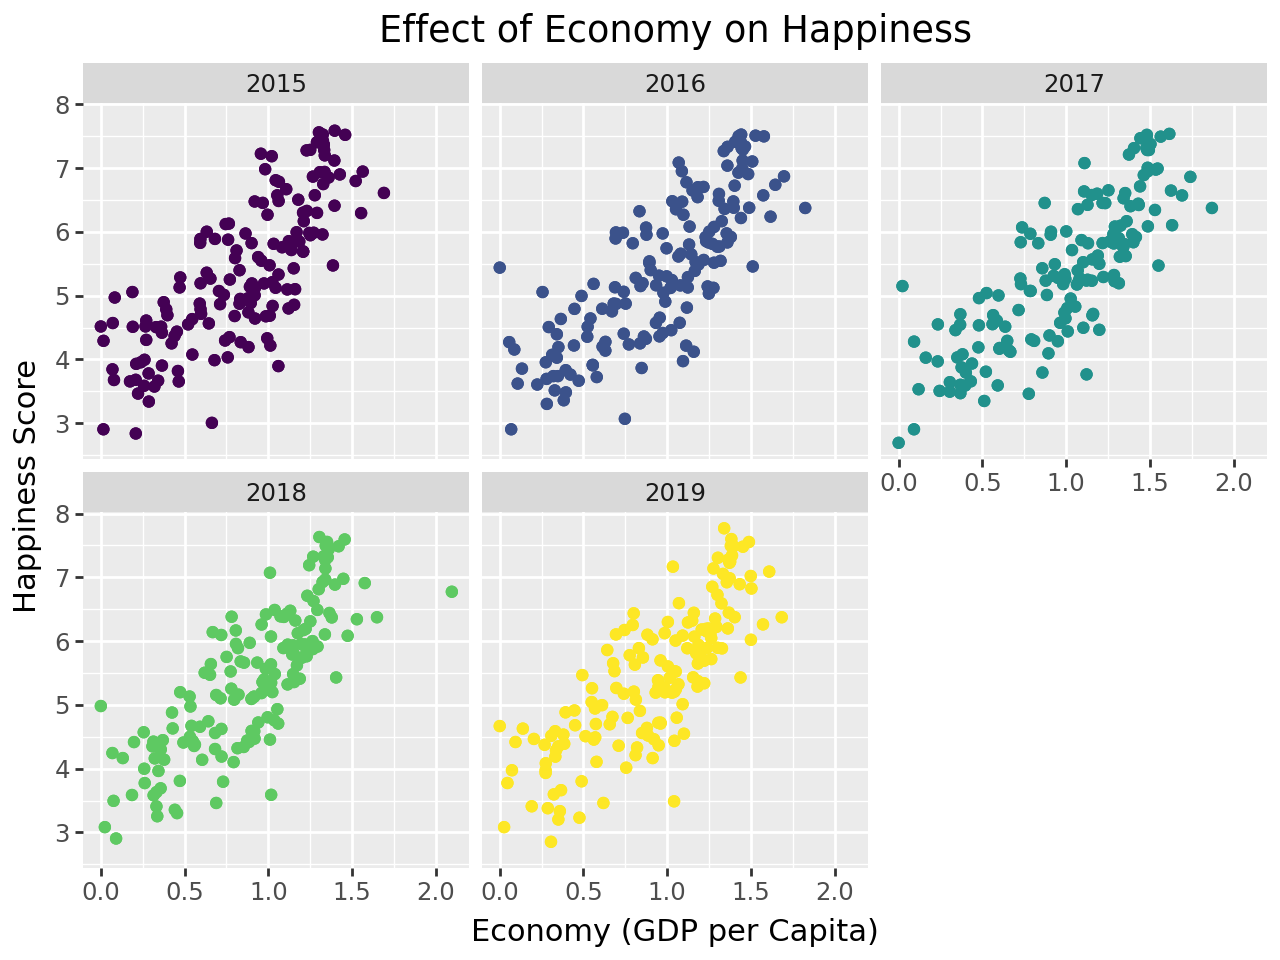

In [ ]:
import plotnine
from plotnine import *

(
  ggplot(df_merge, mapping = aes(x = "Economy (GDP per Capita)", y = "Happiness Score", color="year")) +
  # geom_density(alpha = 0.5) +
  # geom_col() +
  geom_point() +
  geom_jitter() +
  facet_wrap("year") +
  theme(legend_position = "none") +
  labs(x = "Economy (GDP per Capita)",
       y = "Happiness Score",
       title = "Effect of Economy on Happiness")
 )

From the above visualization, we may see that there is a positive, linear relationship between a country’s Economy concern and Happiness Score. As people care more about the economy, perceived happiness increases. This is true for all years.

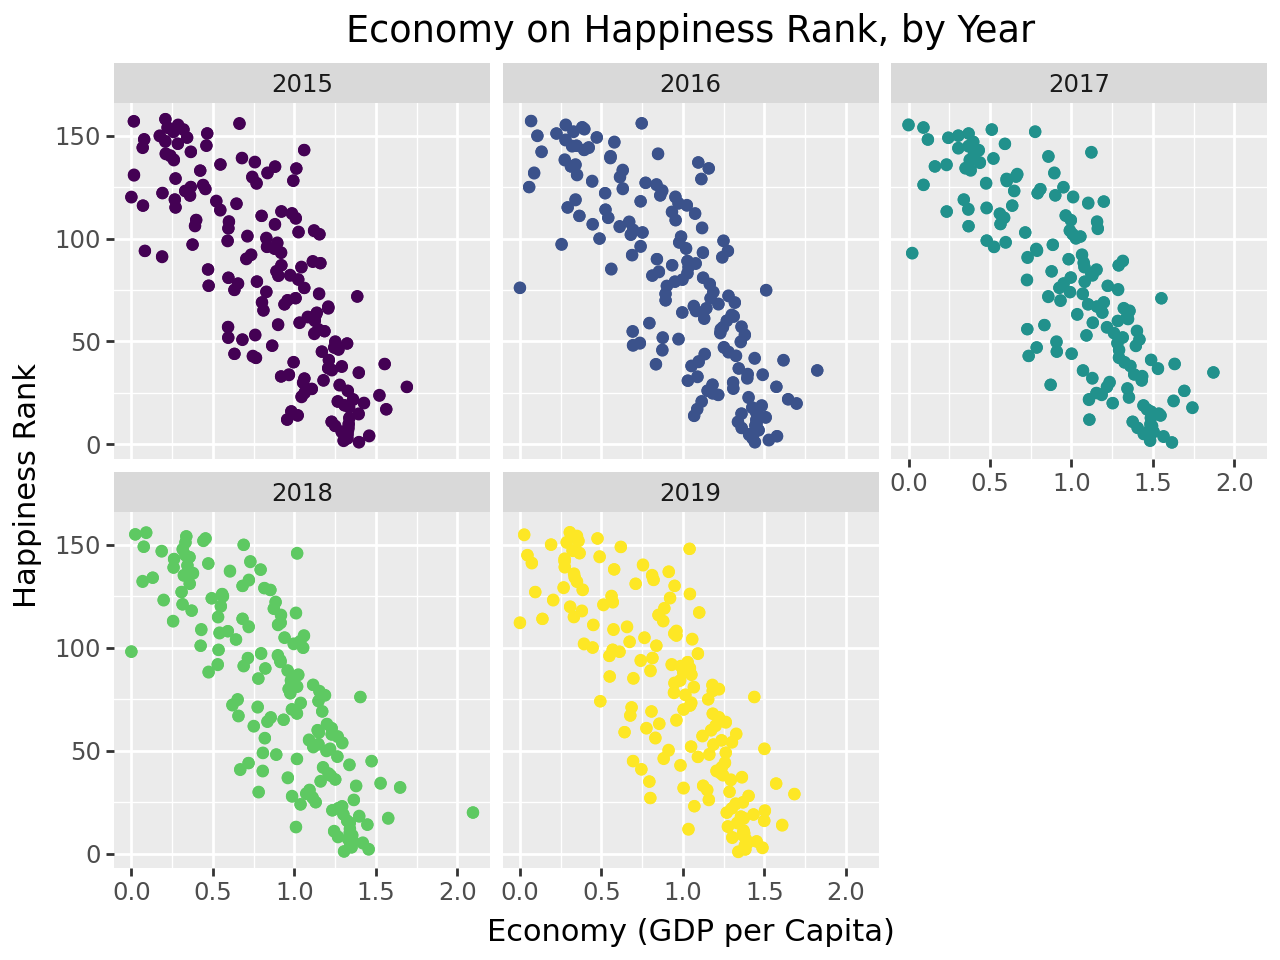

In [ ]:
(
  ggplot(df_merge, mapping = aes(x = "Economy (GDP per Capita)", y="Happiness Rank", color="year"))  +
  # geom_density(alpha = 0.5) +
  # geom_col(position = "dodge") +
  geom_point() +
  geom_jitter() +
  facet_wrap("year") +
  theme(legend_position = "none") +
  labs(x = "Economy (GDP per Capita)",
       y = "Happiness Rank",
       title = "Economy on Happiness Rank, by Year")
 )


From the visualization above, we may see that as weighting for the economy increases, the Happiness Rank increases as well, as those countries move up the ranks. This is a similar assessment to that found above in the first visualization.


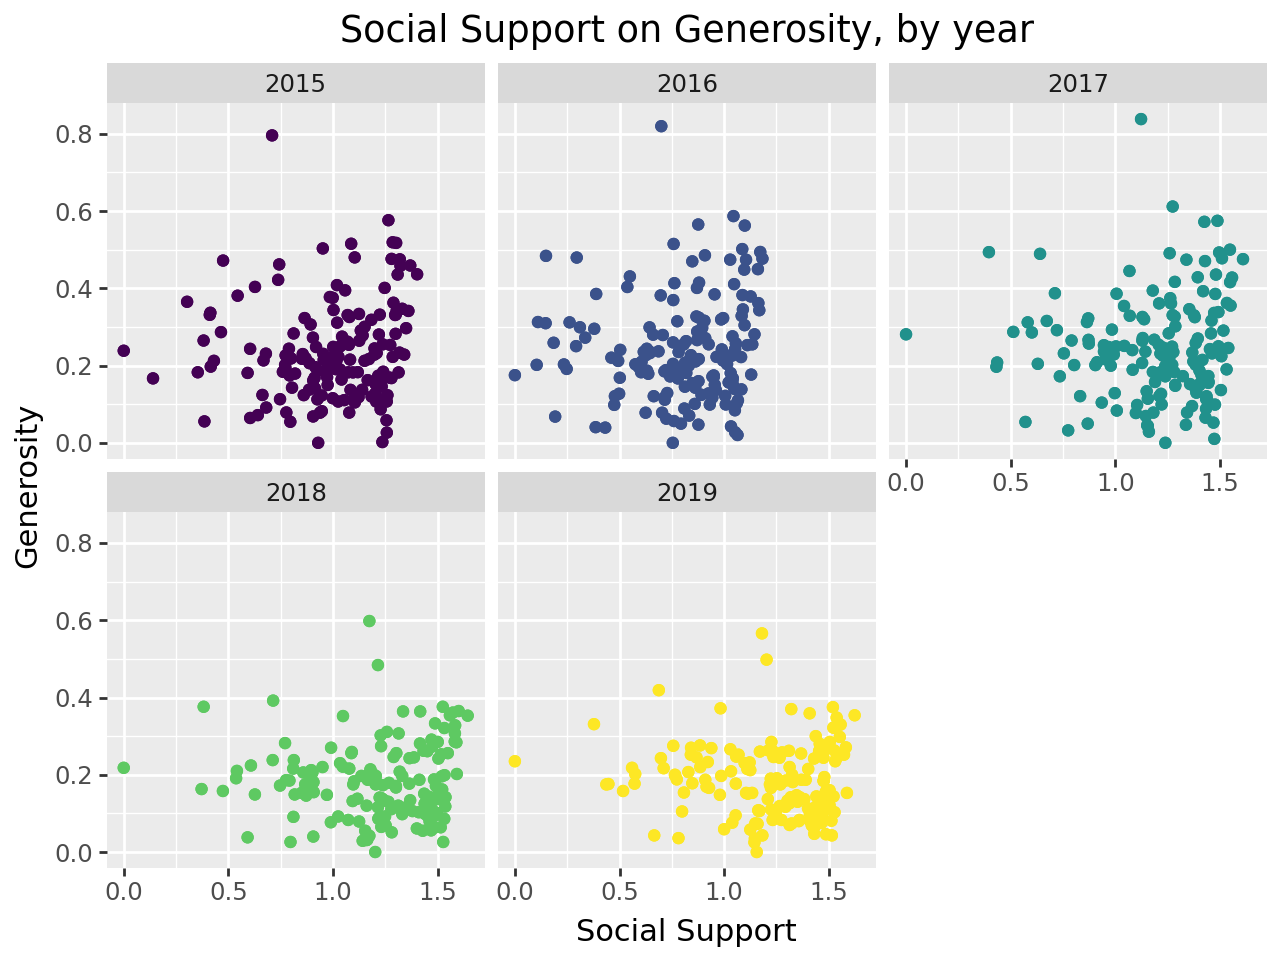

In [ ]:
(
  ggplot(df_merge, mapping = aes(x = "Social support", y = "Generosity", color = "year"))  +
  # geom_density(alpha = 0.5) +
  # geom_col(position = "dodge") +
  geom_point() +
  geom_jitter() +
  facet_wrap("year") +
  theme(legend_position = "none") +
  labs(x = "Social Support",
       y = "Generosity",
       title = "Social Support on Generosity, by year")
 )

In the above visualization, we observe the relationship between two different predictors of Happiness Score, instead. We see that as people increasingly believe in the importance of Social Support (such as familial or community help), the perceived importance of generosity roughly stays the same. However, an interesting trend may be seen through the years. The importance of Social Support on Happiness consistently increases from 2015 to 2019, but the importance of generosity in a country consistently decreases from 2015 to 2019. The data not only has less spread, but also reports lower averages for generosity and higher averages for social support. This may indicate a pessimism that has shifted notably after 2017 as people believe in charity less and believe in social support from their peers more.


## KNN Regression Model

**Tune** the hyperparameters of our model to find the best parameters for our dataset. This will allow us to predict Happiness Score for hypothetical regions or countries.

In [ ]:
# Carry out the grid search here!
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X_train = df_merge.drop(["Country", "Happiness Rank", "Happiness Score"],
                        axis=1)
y_train = df_merge["Happiness Score"]

# Make Column transformer and Pipeline
ct = make_column_transformer(
  (StandardScaler(), make_column_selector(dtype_include = np.number)),
  (OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
   make_column_selector(dtype_include = object)),
  remainder = "drop"
)

pipeline = make_pipeline(
  ct,
  KNeighborsRegressor())

# Use GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(
    pipeline,
    param_grid = {
        "kneighborsregressor__n_neighbors": range(1, 35),
        "kneighborsregressor__weights": ["uniform", "distance"],
        "kneighborsregressor__metric": ["euclidean", "manhattan", "minkowski"],
        "columntransformer__standardscaler__with_mean": [True, False],
        "columntransformer__standardscaler__with_std": [True, False]
    },
    scoring = "neg_mean_squared_error",
    cv = 5,
    return_train_score=True)

grid_cv.fit(X_train,
            y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a3c531c0950>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector obj...
             param_grid={'columntransformer__standardscaler__with_mean': [True,
                                                                          False],
                         'columntransformer__standardscaler__with_std': [True,
                                                                         False],
                         'kneighborsregressor__metric': ['euclidean',
                                                         'manhattan',
                                                         'minkowski'],
                         'kneighborsregressor__n_neighbors': range(1, 35),
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_cv.best_params_

{'columntransformer__standardscaler__with_mean': True,
 'columntransformer__standardscaler__with_std': False,
 'kneighborsregressor__metric': 'euclidean',
 'kneighborsregressor__n_neighbors': 9,
 'kneighborsregressor__weights': 'distance'}

In [ ]:
grid_cv.best_score_
best_mse = -grid_cv.best_score_
best_mse

0.28077346976331186

In [ ]:
knn_rmse = np.sqrt(best_mse)
knn_rmse

0.5298806184069312

The resulting best MSE score of our optimal KNN Regression model is 0.28077346976331186, with a RMSE of 0.5298.

## Fitting Hypothetical Countries on our optimized KNN Regression model.

**Fit** a hypothetical country on our best_params pipeline to find the predicted Happiness Score of that country.

In [ ]:
# Make Column transformer and Pipeline
# ct = make_column_transformer(
#   (StandardScaler(), make_column_selector(dtype_include = np.number)),
#   (OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
#    make_column_selector(dtype_include = object)),
#   remainder = "drop"
# )

# pipeline = make_pipeline(
#   ct,
#   KNeighborsRegressor(n_neighbors = 22))

# Hypothetical Country, FIND HAPPINESS SCORE
X_test = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.521],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.296],
    "year": [2015]
})

# Set the best params found from GridSearchCV onto the pipeline CT and Model
pipeline = pipeline.set_params(**grid_cv.best_params_)

pipeline.fit(X_train, y_train)

# Predict for Hypothetical
predictions = pipeline.predict(X_test)
predictions[0]

7.388613948893892

In [ ]:
# Second Hypothetical country features (increased Social Support by 0.1, all others constant)
X_test_2 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.621],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.296],
    "year": [2015]
})

# Predict for Hypothetical
predictions_2 = pipeline.predict(X_test_2)
predictions_2[0]

7.380658550771172

In [ ]:
# Third Hypothetical country features (increased Economy by 0.1, all others constant)
X_test_3 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.496],
    "Social support": [1.521],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.296],
    "year": [2015]
})

# Fourth Hypothetical country features (increased Health by 0.1, all others constant)
X_test_4 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.521],
    "Health (Life Expectancy)": [1.096],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.296],
    "year": [2015]
})

# Fifth Hypothetical country features (increased Freedom by 0.1, all others constant)
X_test_5 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.521],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.7],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.296],
    "year": [2015]
})

# Sixth Hypothetical country features (increased Trust by 0.1, all others constant)
X_test_6 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.521],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.519],
    "Generosity": [0.296],
    "year": [2015]
})

# Seventh Hypothetical country features (increased Generosity by 0.1, all others constant)
X_test_7 = pd.DataFrame({
    "Economy (GDP per Capita)": [1.396],
    "Social support": [1.521],
    "Health (Life Expectancy)": [0.996],
    "Freedom": [0.6],
    "Trust (Government Corruption)": [0.419],
    "Generosity": [0.396],
    "year": [2015]
})


In [ ]:
predictions_3 = pipeline.predict(X_test_3)
predictions_3[0]

7.354652523005039

In [ ]:
predictions_4 = pipeline.predict(X_test_4)
predictions_4[0]

7.383692785756877

In [ ]:
predictions_5 = pipeline.predict(X_test_5)
predictions_5[0]

7.392108339422479

In [ ]:
predictions_6 = pipeline.predict(X_test_6)
predictions_6[0]

7.3928651894720945

In [ ]:
predictions_7 = pipeline.predict(X_test_7)
predictions_7[0]

7.372258264212481

In [ ]:
# Look at Predictions based on 0.1 increase in each predictor, as compared to the Baseline Country Happiness Scores and features.
Happiness_Score_Predictions = [predictions[0], predictions_3[0], predictions_2[0], predictions_4[0], predictions_5[0], predictions_6[0], predictions_7[0]]
changes = [x - predictions[0] for x in Happiness_Score_Predictions]

knnDeltaDf = pd.DataFrame({
  "Column": ["Baseline", "Economy (GDP per Capita)", "Social support", "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)", "Generosity"],
  "Happiness Scores": Happiness_Score_Predictions,
  "Difference in Happiness Score after Increase": changes
})
knnDeltaDf

,Column,Happiness Scores,Difference in Happiness Score after Increase
0,Baseline,7.388614,0.000000
1,Economy (GDP per Capita),7.354653,-0.033961
2,Social support,7.380659,-0.007955
3,Health (Life Expectancy),7.383693,-0.004921
4,Freedom,7.392108,0.003494
5,Trust (Government Corruption),7.392865,0.004251
6,Generosity,7.372258,-0.016356


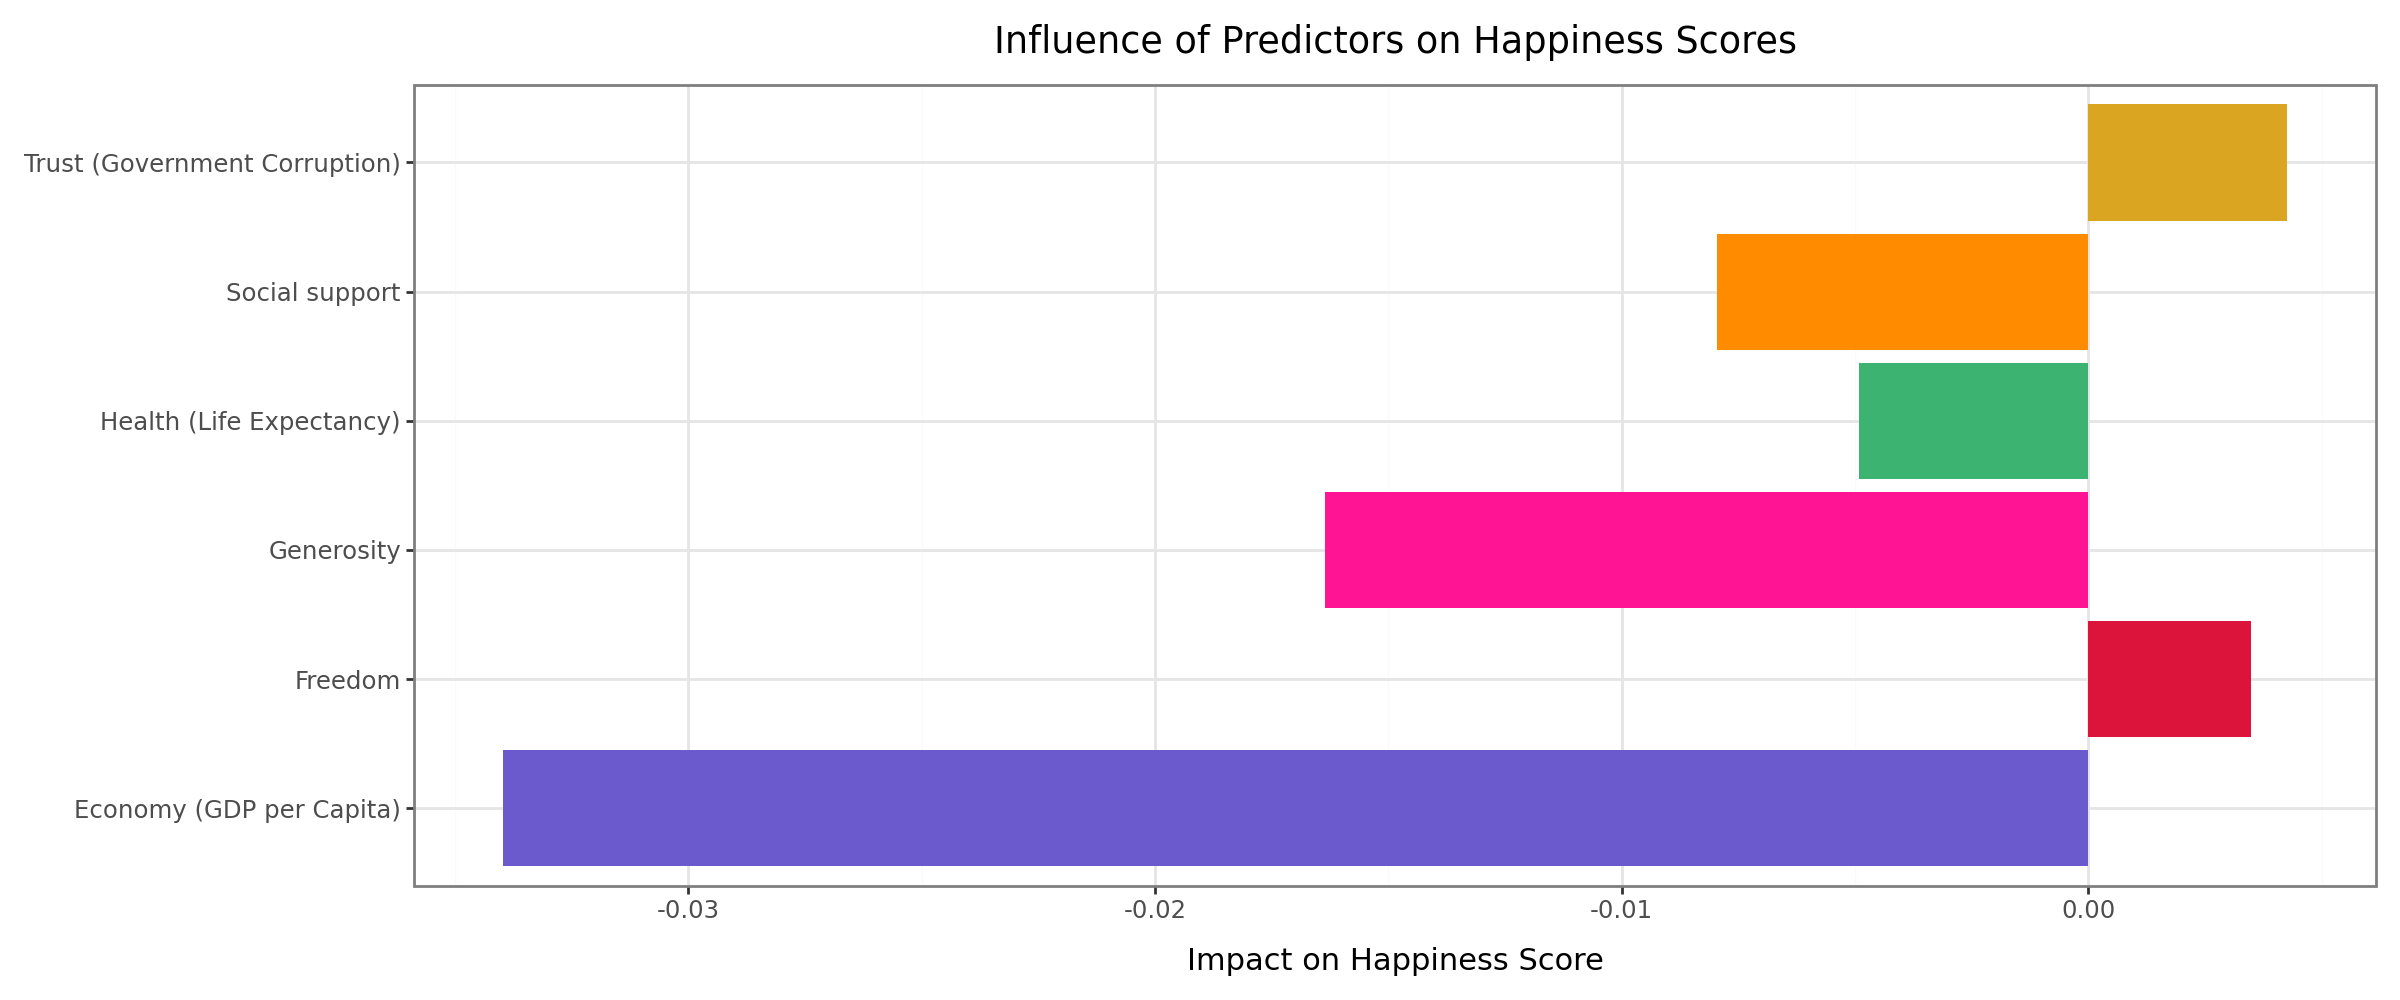

In [ ]:
from plotnine import scale_color_manual

colors = {"Economy (GDP per Capita)": "slateblue", "Social support": "darkorange", "Health (Life Expectancy)": "mediumseagreen", "Freedom": "crimson", "Trust (Government Corruption)": "goldenrod", "Generosity": "deeppink"}

(
  ggplot(knnDeltaDf.drop(0, axis=0), mapping = aes(x = "Column", y="Difference in Happiness Score after Increase", fill = "Column"))  +
  # geom_density(alpha = 0.5) +
  geom_col(position = "dodge") +
  theme(legend_position = "none") +
  theme_bw() +
  coord_flip() +
  theme(figure_size=(12, 5)) +
  scale_fill_manual(values=colors) +
  theme(legend_position = "none") +
  labs(x = "",
       y = "Impact on Happiness Score",
       title = "Influence of Predictors on Happiness Scores")
 )

Looking at the changes in Happiness Scores after adjusting each predictor by a 0.1 increase, while holding all other variables constant, we may see that people's perception of the Economy is the most influential predictor for Happiness Scores of a country. For a 0.1 increase in weighting for Freedom, there is an associated 0.0339 decrease in Happiness Score.




In [ ]:
X_test

,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,1.396,1.521,0.996,0.6,0.419,0.296,2015


**Some more Visualizations**

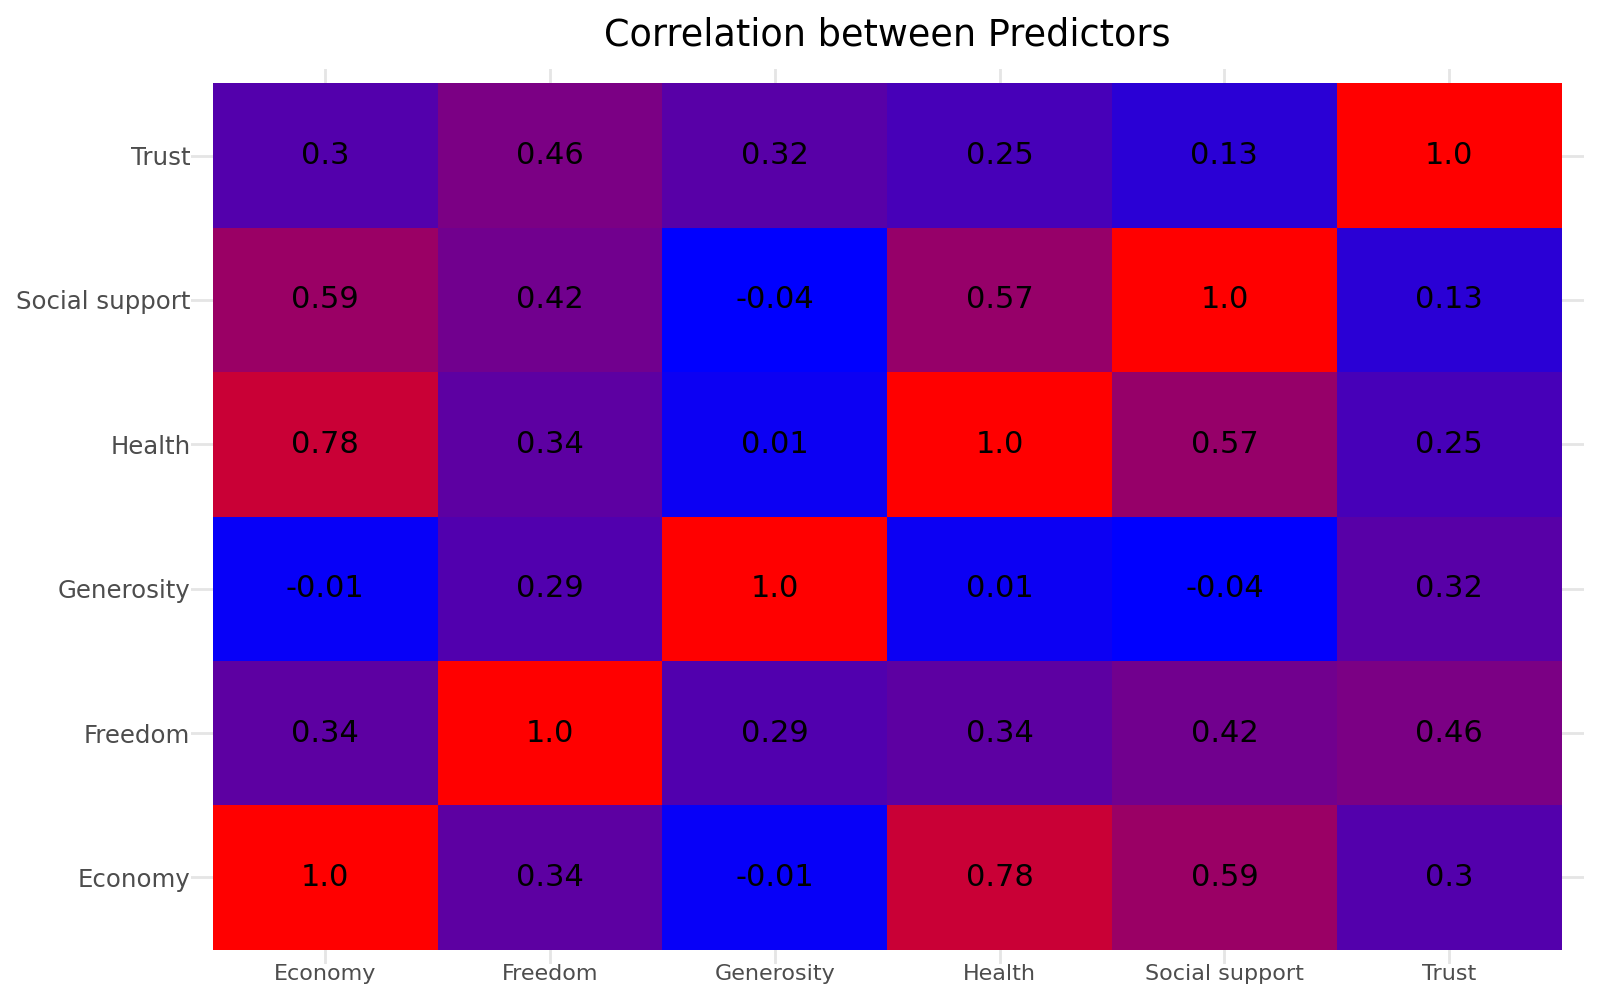

In [ ]:
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal

# Compute correlation matrix
df_merge_short = df_merge.rename(columns={"Economy (GDP per Capita)": "Economy", "Health (Life Expectancy)": "Health", "Trust (Government Corruption)": "Trust"})
corr_matrix = df_merge_short.drop(["Country", "Happiness Score", "Happiness Rank", "year"], axis=1).corr()

# Convert to long format
corr_long = corr_matrix.reset_index().melt(id_vars='index')
corr_long.columns = ['Predictor 1', 'Predictor 2', 'Correlation']
corr_long['Correlation'] = corr_long['Correlation'].round(2)
corr_long

# Plot the heatmap
(
    ggplot(corr_long, aes(x='Predictor 1', y='Predictor 2', fill='Correlation')) +
    geom_tile() +
    geom_text(aes(label="Correlation")) +
    scale_fill_gradient(low='blue', high='red') +
    theme_minimal() +
    theme(legend_position = "none") +
    theme(figure_size=(8, 5)) +
    theme(axis_text_x=element_text(size=8)) +
    labs(x="", y="", title = "Correlation between Predictors")
)

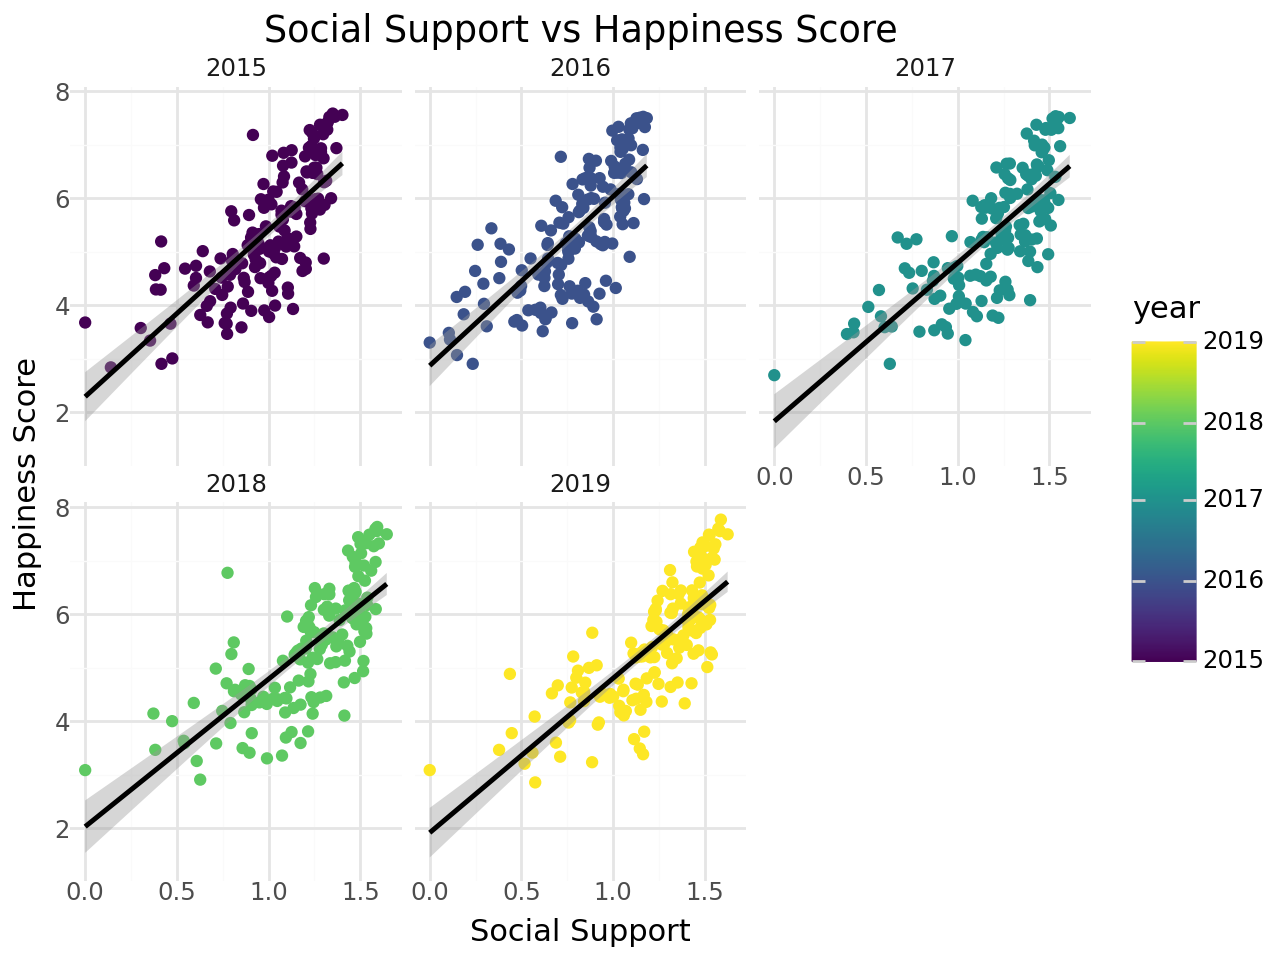

In [ ]:
(
    ggplot(df_merge, aes(x="Social support", y="Happiness Score", color="year")) +
    geom_point() +
    geom_smooth(method='lm', color="black") +
    facet_wrap("year") +
    theme_minimal() +
    labs(title="Social Support vs Happiness Score",
         x="Social Support",
         y="Happiness Score")
)


##Linear Regression

**Fit** a Lin-Reg model on the merged dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(
    ct,
    LinearRegression()
)

param_grid = {
    "linearregression__fit_intercept": [True, False],
    #"linearregression__normalize": [True, False],
    "columntransformer__standardscaler__with_mean": [True, False],
    "columntransformer__standardscaler__with_std": [True, False]
}

grid_cv = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    return_train_score=True
)

grid_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(with_std=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a3c531c0950>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a3c52b5b590>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'columntransformer__standardscaler__with_mean': [True,
                                                                          False],
                         'columntransformer__standardscaler__with_std': [True,
                                                                         False],
                         'linearregression__fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_cv.best_params_

{'columntransformer__standardscaler__with_mean': True,
 'columntransformer__standardscaler__with_std': False,
 'linearregression__fit_intercept': True}

In [ ]:
linreg_mse = -grid_cv.best_score_

In [ ]:
linreg_rmse = np.sqrt(linreg_mse)
linreg_rmse

0.5607303167171739

From our Linear Regression model, we may see that the predictor of Freedom has the largest influence on Happiness Score, with a value of 1.42. For every standard deviaiton above the mean in weighting for Freedom, there is an associated increase in Happiness Scores by 1.42 for all countries surveyed.

In [ ]:
pipeline = pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
predictions[0]

7.362475511150436

In [ ]:
pipeline = pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
predictions_2 = pipeline.predict(X_test_2)
predictions_2[0]

7.445170313687983

In [ ]:
pipeline = pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
predictions_3 = pipeline.predict(X_test_3)
predictions_3[0]

7.466426287342848

In [ ]:
pipeline = pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
predictions_4 = pipeline.predict(X_test_4)
predictions_4[0]

7.470483268588152

In [ ]:
pipeline = pipeline.set_params(**grid_cv.best_params_)
pipeline.fit(X_train, y_train)
predictions_5 = pipeline.predict(X_test_5)
predictions_5[0]

7.50448135502279

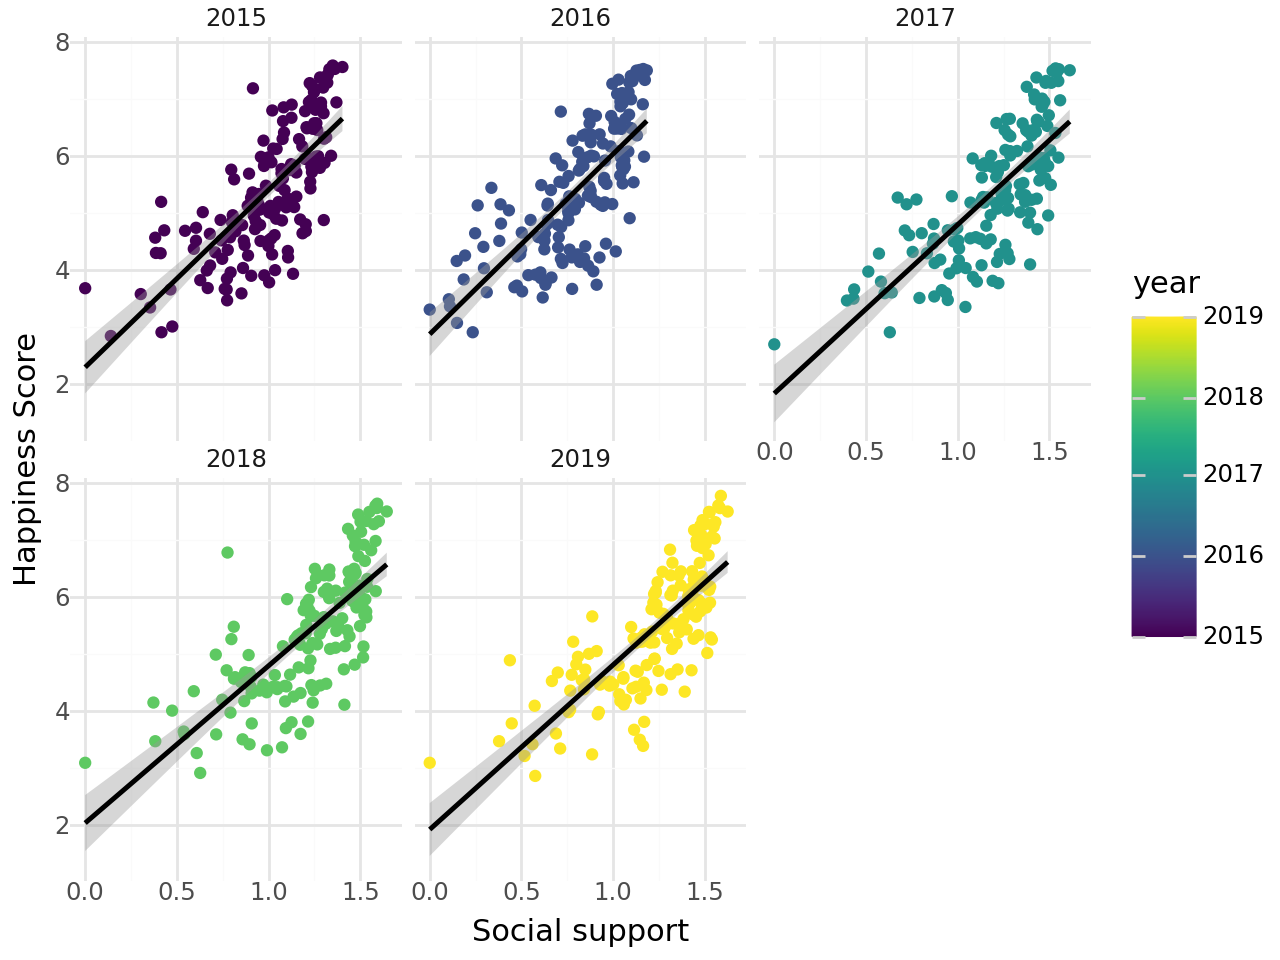

In [ ]:
(
    ggplot(df_merge, aes(x="Social support", y="Happiness Score", color="year")) +
    geom_point() +
    geom_smooth(method='lm', color="black") +
    facet_wrap("year") +
    theme_minimal()
)

In [ ]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to html --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>